In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")  # This is used when you prefer NOT to see warning messages.

In [3]:
data = pd.read_csv(r'C:\Users\rathi\course8-Renaissa\orbcomm_ml_dataset_all_filters_subsampled.csv')
data

,t_start_sec,window_stride,channel,filter_type,fc_mhz,bw_khz,f_offset_hz,fpass1_hz,fpass2_hz,raw_inband_power_direct,...,coherence,peak_metric,psr_proxy,delay_sec,delay_stability_sec,filter_order,transition_hz,y_reg_psr,y_cls_reliable,reliability_threshold_psr_proxy_q75
0,0.000,5,S-1,butterworth,137.2000,25,-300000,-312000,-288000,4946.125291,...,0.082259,2.965973e+05,0.135131,-0.000713,NaN,6,1000,0.135131,0,0.741824
1,0.000,5,S-1,chebyshev1,137.2000,25,-300000,-312000,-288000,4946.125291,...,0.082723,2.797520e+05,0.132851,-0.000713,NaN,6,1000,0.132851,0,0.741824
2,0.000,5,S-1,bessel,137.2000,25,-300000,-312000,-288000,4946.125291,...,0.086344,1.916733e+05,0.163546,-0.000713,NaN,6,1000,0.163546,0,0.741824
3,0.000,5,S-2,butterworth,137.2250,25,-275000,-287000,-263000,5267.799610,...,0.034400,1.319807e+05,0.055452,-0.000817,NaN,6,1000,0.055452,0,0.741824
4,0.000,5,S-2,chebyshev1,137.2250,25,-275000,-287000,-263000,5267.799610,...,0.035219,1.272763e+05,0.056189,-0.000817,NaN,6,1000,0.056189,0,0.741824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18715,59.875,5,S-12,chebyshev1,137.3125,25,-187500,-199500,-175500,5264.787402,...,0.423465,1.682873e+06,0.703596,-0.000804,0.001558,6,1000,0.703596,0,0.741824
18716,59.875,5,S-12,bessel,137.3125,25,-187500,-199500,-175500,5264.787402,...,0.437141,1.151501e+06,0.858607,-0.000804,0.001558,6,1000,0.858607,1,0.741824
18717,59.875,5,Gateway,butterworth,137.5600,50,60000,35500,84500,5213.656061,...,0.485829,4.582941e+06,0.799710,0.000010,0.000304,6,1000,0.799710,1,0.741824
18718,59.875,5,Gateway,chebyshev1,137.5600,50,60000,35500,84500,5213.656061,...,0.484380,4.300861e+06,0.793719,0.000010,0.000304,6,1000,0.793719,1,0.741824


In [4]:
# Determine the data type of each column of the original data with outliers
data.dtypes

t_start_sec                            float64
window_stride                            int64
channel                                 object
filter_type                             object
fc_mhz                                 float64
bw_khz                                   int64
f_offset_hz                              int64
fpass1_hz                                int64
fpass2_hz                                int64
raw_inband_power_direct                float64
raw_inband_power_reflected             float64
inband_power_direct                    float64
inband_power_reflected                 float64
noise_floor_direct                     float64
noise_floor_reflected                  float64
leakage_power_direct                   float64
leakage_power_reflected                float64
interference_metric                    float64
coherence                              float64
peak_metric                            float64
psr_proxy                              float64
delay_sec    

In [5]:
# Fetch the column names from the dataset
data.columns

Index(['t_start_sec', 'window_stride', 'channel', 'filter_type', 'fc_mhz',
       'bw_khz', 'f_offset_hz', 'fpass1_hz', 'fpass2_hz',
       'raw_inband_power_direct', 'raw_inband_power_reflected',
       'inband_power_direct', 'inband_power_reflected', 'noise_floor_direct',
       'noise_floor_reflected', 'leakage_power_direct',
       'leakage_power_reflected', 'interference_metric', 'coherence',
       'peak_metric', 'psr_proxy', 'delay_sec', 'delay_stability_sec',
       'filter_order', 'transition_hz', 'y_reg_psr', 'y_cls_reliable',
       'reliability_threshold_psr_proxy_q75'],
      dtype='object')

In [6]:
# Find the number of missing values for each column before imputing missing values
data.isnull().sum()

t_start_sec                             0
window_stride                           0
channel                                 0
filter_type                             0
fc_mhz                                  0
bw_khz                                  0
f_offset_hz                             0
fpass1_hz                               0
fpass2_hz                               0
raw_inband_power_direct                 0
raw_inband_power_reflected              0
inband_power_direct                     0
inband_power_reflected                  0
noise_floor_direct                      0
noise_floor_reflected                   0
leakage_power_direct                    0
leakage_power_reflected                 0
interference_metric                     0
coherence                               0
peak_metric                             0
psr_proxy                               0
delay_sec                               0
delay_stability_sec                    39
filter_order                      

In [7]:
# Fill in the missing values for the 'delay_stability_sec' column with the mean value
my_conti_col = ['delay_stability_sec']
for i in my_conti_col:
    mean_values = data[i].mean()
    data[i] = data[i].fillna(mean_values)

In [8]:
# Find the number of missing values for each column after imputing missing values
data.isnull().sum()

t_start_sec                            0
window_stride                          0
channel                                0
filter_type                            0
fc_mhz                                 0
bw_khz                                 0
f_offset_hz                            0
fpass1_hz                              0
fpass2_hz                              0
raw_inband_power_direct                0
raw_inband_power_reflected             0
inband_power_direct                    0
inband_power_reflected                 0
noise_floor_direct                     0
noise_floor_reflected                  0
leakage_power_direct                   0
leakage_power_reflected                0
interference_metric                    0
coherence                              0
peak_metric                            0
psr_proxy                              0
delay_sec                              0
delay_stability_sec                    0
filter_order                           0
transition_hz   

In [9]:
# Print the unique values of each column of the original data with outliers
for i in data.columns:
    print(data[i].unique())

[ 0.     0.125  0.25   0.375  0.5    0.625  0.75   0.875  1.     1.125
  1.25   1.375  1.5    1.625  1.75   1.875  2.     2.125  2.25   2.375
  2.5    2.625  2.75   2.875  3.     3.125  3.25   3.375  3.5    3.625
  3.75   3.875  4.     4.125  4.25   4.375  4.5    4.625  4.75   4.875
  5.     5.125  5.25   5.375  5.5    5.625  5.75   5.875  6.     6.125
  6.25   6.375  6.5    6.625  6.75   6.875  7.     7.125  7.25   7.375
  7.5    7.625  7.75   7.875  8.     8.125  8.25   8.375  8.5    8.625
  8.75   8.875  9.     9.125  9.25   9.375  9.5    9.625  9.75   9.875
 10.    10.125 10.25  10.375 10.5   10.625 10.75  10.875 11.    11.125
 11.25  11.375 11.5   11.625 11.75  11.875 12.    12.125 12.25  12.375
 12.5   12.625 12.75  12.875 13.    13.125 13.25  13.375 13.5   13.625
 13.75  13.875 14.    14.125 14.25  14.375 14.5   14.625 14.75  14.875
 15.    15.125 15.25  15.375 15.5   15.625 15.75  15.875 16.    16.125
 16.25  16.375 16.5   16.625 16.75  16.875 17.    17.125 17.25  17.375
 17.5 

In [10]:
# Create a copy of the numeric data to avoid modifying the original
no_outlier = data.copy()

def outlier_cleanup(col):
    # Calculate IQR and outlier fences
    q1 = no_outlier[col].quantile(0.25)
    q3 = no_outlier[col].quantile(0.75)
    iqr = q3 - q1
    lf = q1 - (1.5 * iqr)  # lower fence
    uf = q3 + (1.5 * iqr)  # upper fence

    # Check column type for proper handling of integer and float types
    col_type = str(no_outlier[col].dtype)

    # Apply outlier treatment
    if col_type in ["int64", "int32", "int16", "int8"]:
        # For integer columns, round the fence values and cast them to integers
        no_outlier.loc[no_outlier[col] < lf, col] = int(round(lf))
        no_outlier.loc[no_outlier[col] > uf, col] = int(round(uf))
    else:
        # For float columns, directly assign the fence values
        no_outlier.loc[no_outlier[col] < lf, col] = lf
        no_outlier.loc[no_outlier[col] > uf, col] = uf

# Apply outlier cleanup to specific columns
my_conti_cols = ['f_offset_hz', 'fpass1_hz', 'fpass2_hz',
       'raw_inband_power_direct', 'raw_inband_power_reflected',
       'inband_power_direct', 'inband_power_reflected', 'noise_floor_direct',
       'noise_floor_reflected', 'leakage_power_direct',
       'leakage_power_reflected', 'interference_metric', 'coherence',
       'peak_metric', 'psr_proxy', 'delay_sec', 'delay_stability_sec', 'y_reg_psr']
for col in my_conti_cols:
    outlier_cleanup(col)

no_outlier

,t_start_sec,window_stride,channel,filter_type,fc_mhz,bw_khz,f_offset_hz,fpass1_hz,fpass2_hz,raw_inband_power_direct,...,coherence,peak_metric,psr_proxy,delay_sec,delay_stability_sec,filter_order,transition_hz,y_reg_psr,y_cls_reliable,reliability_threshold_psr_proxy_q75
0,0.000,5,S-1,butterworth,137.2000,25,-300000,-312000,-288000,4946.125291,...,0.082259,2.965973e+05,0.135131,-0.000713,0.000522,6,1000,0.135131,0,0.741824
1,0.000,5,S-1,chebyshev1,137.2000,25,-300000,-312000,-288000,4946.125291,...,0.082723,2.797520e+05,0.132851,-0.000713,0.000522,6,1000,0.132851,0,0.741824
2,0.000,5,S-1,bessel,137.2000,25,-300000,-312000,-288000,4946.125291,...,0.086344,1.916733e+05,0.163546,-0.000713,0.000522,6,1000,0.163546,0,0.741824
3,0.000,5,S-2,butterworth,137.2250,25,-275000,-287000,-263000,5267.799610,...,0.034400,1.319807e+05,0.055452,-0.000817,0.000522,6,1000,0.055452,0,0.741824
4,0.000,5,S-2,chebyshev1,137.2250,25,-275000,-287000,-263000,5267.799610,...,0.035219,1.272763e+05,0.056189,-0.000817,0.000522,6,1000,0.056189,0,0.741824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18715,59.875,5,S-12,chebyshev1,137.3125,25,-187500,-199500,-175500,5264.787402,...,0.423465,1.682873e+06,0.703596,-0.000804,0.001549,6,1000,0.703596,0,0.741824
18716,59.875,5,S-12,bessel,137.3125,25,-187500,-199500,-175500,5264.787402,...,0.437141,1.151501e+06,0.858607,-0.000804,0.001549,6,1000,0.858607,1,0.741824
18717,59.875,5,Gateway,butterworth,137.5600,50,60000,35500,84500,5213.656061,...,0.485829,3.279866e+06,0.799710,0.000010,0.000304,6,1000,0.799710,1,0.741824
18718,59.875,5,Gateway,chebyshev1,137.5600,50,60000,35500,84500,5213.656061,...,0.484380,3.279866e+06,0.793719,0.000010,0.000304,6,1000,0.793719,1,0.741824


In [11]:
# Print the unique values of each column without any outliers
for i in no_outlier.columns:
    print(no_outlier[i].unique())

[ 0.     0.125  0.25   0.375  0.5    0.625  0.75   0.875  1.     1.125
  1.25   1.375  1.5    1.625  1.75   1.875  2.     2.125  2.25   2.375
  2.5    2.625  2.75   2.875  3.     3.125  3.25   3.375  3.5    3.625
  3.75   3.875  4.     4.125  4.25   4.375  4.5    4.625  4.75   4.875
  5.     5.125  5.25   5.375  5.5    5.625  5.75   5.875  6.     6.125
  6.25   6.375  6.5    6.625  6.75   6.875  7.     7.125  7.25   7.375
  7.5    7.625  7.75   7.875  8.     8.125  8.25   8.375  8.5    8.625
  8.75   8.875  9.     9.125  9.25   9.375  9.5    9.625  9.75   9.875
 10.    10.125 10.25  10.375 10.5   10.625 10.75  10.875 11.    11.125
 11.25  11.375 11.5   11.625 11.75  11.875 12.    12.125 12.25  12.375
 12.5   12.625 12.75  12.875 13.    13.125 13.25  13.375 13.5   13.625
 13.75  13.875 14.    14.125 14.25  14.375 14.5   14.625 14.75  14.875
 15.    15.125 15.25  15.375 15.5   15.625 15.75  15.875 16.    16.125
 16.25  16.375 16.5   16.625 16.75  16.875 17.    17.125 17.25  17.375
 17.5 

# Need to convert all categorical columns into numerical data - label encoding. So, we use the label encoder.

In [13]:
# Label Encoding in categorical columns
from sklearn import preprocessing

categ = data.select_dtypes(exclude="number")

for i in categ.columns:
    encoder = preprocessing.LabelEncoder()  # Encoder is the object of 'LabelEncoder'.
    no_outlier[i] = encoder.fit_transform(no_outlier[i])  # We will not scale the categorical columns.

no_outlier

,t_start_sec,window_stride,channel,filter_type,fc_mhz,bw_khz,f_offset_hz,fpass1_hz,fpass2_hz,raw_inband_power_direct,...,coherence,peak_metric,psr_proxy,delay_sec,delay_stability_sec,filter_order,transition_hz,y_reg_psr,y_cls_reliable,reliability_threshold_psr_proxy_q75
0,0.000,5,1,1,137.2000,25,-300000,-312000,-288000,4946.125291,...,0.082259,2.965973e+05,0.135131,-0.000713,0.000522,6,1000,0.135131,0,0.741824
1,0.000,5,1,2,137.2000,25,-300000,-312000,-288000,4946.125291,...,0.082723,2.797520e+05,0.132851,-0.000713,0.000522,6,1000,0.132851,0,0.741824
2,0.000,5,1,0,137.2000,25,-300000,-312000,-288000,4946.125291,...,0.086344,1.916733e+05,0.163546,-0.000713,0.000522,6,1000,0.163546,0,0.741824
3,0.000,5,5,1,137.2250,25,-275000,-287000,-263000,5267.799610,...,0.034400,1.319807e+05,0.055452,-0.000817,0.000522,6,1000,0.055452,0,0.741824
4,0.000,5,5,2,137.2250,25,-275000,-287000,-263000,5267.799610,...,0.035219,1.272763e+05,0.056189,-0.000817,0.000522,6,1000,0.056189,0,0.741824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18715,59.875,5,4,2,137.3125,25,-187500,-199500,-175500,5264.787402,...,0.423465,1.682873e+06,0.703596,-0.000804,0.001549,6,1000,0.703596,0,0.741824
18716,59.875,5,4,0,137.3125,25,-187500,-199500,-175500,5264.787402,...,0.437141,1.151501e+06,0.858607,-0.000804,0.001549,6,1000,0.858607,1,0.741824
18717,59.875,5,0,1,137.5600,50,60000,35500,84500,5213.656061,...,0.485829,3.279866e+06,0.799710,0.000010,0.000304,6,1000,0.799710,1,0.741824
18718,59.875,5,0,2,137.5600,50,60000,35500,84500,5213.656061,...,0.484380,3.279866e+06,0.793719,0.000010,0.000304,6,1000,0.793719,1,0.741824


# For 'scaler.fit_transform(new_df).to_numpy()':
    # DataFrame is converted into NumPy
    # NumPy is scaled with 'MinMaxScaler', which only works with NumPy array
    # Scaled data is converted back to DataFrame

In [15]:
# Scaling in numerical columns
from sklearn.preprocessing import MinMaxScaler
def my_scaling(col):
    my_scaling_obj = MinMaxScaler()
    no_outlier[col] = pd.DataFrame(my_scaling_obj.fit_transform(no_outlier[col].to_numpy().reshape(-1,1)))
    return no_outlier[col]
my_numerical_cols = ['t_start_sec', 'window_stride', 'fc_mhz', 'bw_khz', 'f_offset_hz', 'fpass1_hz', 'fpass2_hz',
       'raw_inband_power_direct', 'raw_inband_power_reflected', 'inband_power_direct', 'inband_power_reflected', 
       'noise_floor_direct', 'noise_floor_reflected', 'leakage_power_direct', 'leakage_power_reflected', 'interference_metric', 
       'coherence', 'peak_metric', 'psr_proxy', 'delay_sec', 'delay_stability_sec', 'filter_order', 'transition_hz', 'y_reg_psr', 
       'reliability_threshold_psr_proxy_q75']
for i in my_numerical_cols:
    no_outlier[i] = my_scaling(i)
no_outlier

,t_start_sec,window_stride,channel,filter_type,fc_mhz,bw_khz,f_offset_hz,fpass1_hz,fpass2_hz,raw_inband_power_direct,...,coherence,peak_metric,psr_proxy,delay_sec,delay_stability_sec,filter_order,transition_hz,y_reg_psr,y_cls_reliable,reliability_threshold_psr_proxy_q75
0,0.0,0.0,1,1,0.000000,0.0,0.000000,0.000000,0.000000,0.248756,...,0.128767,0.089624,0.107022,0.216801,0.336704,0.0,0.0,0.107022,0,0.0
1,0.0,0.0,1,2,0.000000,0.0,0.000000,0.000000,0.000000,0.248756,...,0.129504,0.084484,0.105189,0.216801,0.336704,0.0,0.0,0.105189,0,0.0
2,0.0,0.0,1,0,0.000000,0.0,0.000000,0.000000,0.000000,0.248756,...,0.135245,0.057605,0.129856,0.216801,0.336704,0.0,0.0,0.129856,0,0.0
3,0.0,0.0,5,1,0.041667,0.0,0.041667,0.041667,0.041667,0.522844,...,0.052879,0.039390,0.042990,0.173802,0.336704,0.0,0.0,0.042990,0,0.0
4,0.0,0.0,5,2,0.041667,0.0,0.041667,0.041667,0.041667,0.522844,...,0.054178,0.037954,0.043582,0.173802,0.336704,0.0,0.0,0.043582,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18715,1.0,0.0,4,2,0.187500,0.0,0.187500,0.187500,0.187500,0.520278,...,0.669804,0.512661,0.563847,0.179231,1.000000,0.0,0.0,0.563847,0,0.0
18716,1.0,0.0,4,0,0.187500,0.0,0.187500,0.187500,0.187500,0.520278,...,0.691491,0.350507,0.688416,0.179231,1.000000,0.0,0.0,0.688416,1,0.0
18717,1.0,0.0,0,1,0.600000,1.0,0.600000,0.579167,0.620833,0.476710,...,0.768693,1.000000,0.641085,0.516735,0.196415,0.0,0.0,0.641085,1,0.0
18718,1.0,0.0,0,2,0.600000,1.0,0.600000,0.579167,0.620833,0.476710,...,0.766395,1.000000,0.636271,0.516735,0.196415,0.0,0.0,0.636271,1,0.0


In [16]:
# Determine the data type of each column without any outliers
no_outlier.dtypes

t_start_sec                            float64
window_stride                          float64
channel                                  int32
filter_type                              int32
fc_mhz                                 float64
bw_khz                                 float64
f_offset_hz                            float64
fpass1_hz                              float64
fpass2_hz                              float64
raw_inband_power_direct                float64
raw_inband_power_reflected             float64
inband_power_direct                    float64
inband_power_reflected                 float64
noise_floor_direct                     float64
noise_floor_reflected                  float64
leakage_power_direct                   float64
leakage_power_reflected                float64
interference_metric                    float64
coherence                              float64
peak_metric                            float64
psr_proxy                              float64
delay_sec    

In [17]:
# Find the number of unique values for each column without any outliers
no_outlier.nunique()

t_start_sec                              480
window_stride                              1
channel                                   13
filter_type                                3
fc_mhz                                    13
bw_khz                                     2
f_offset_hz                               13
fpass1_hz                                 13
fpass2_hz                                 13
raw_inband_power_direct                 6154
raw_inband_power_reflected              5810
inband_power_direct                    18720
inband_power_reflected                 17735
noise_floor_direct                       476
noise_floor_reflected                    480
leakage_power_direct                   18720
leakage_power_reflected                18689
interference_metric                     6086
coherence                              18720
peak_metric                            18341
psr_proxy                              18720
delay_sec                               5933
delay_stab

# Multiple Linear Regression

In [19]:
my_corr = no_outlier.corr()[['y_reg_psr']].sort_values(by='y_reg_psr', ascending=False)
my_corr

,y_reg_psr
y_reg_psr,1.000000
psr_proxy,1.000000
coherence,0.984084
peak_metric,0.825196
noise_floor_reflected,0.796124
y_cls_reliable,0.773096
raw_inband_power_reflected,0.762749
t_start_sec,0.639079
inband_power_reflected,0.453520
fc_mhz,0.246816


# Check multi-colinearity between independent variables using the VIF score.

In [21]:
no_start_time = no_outlier.drop("y_reg_psr", axis=1)
no_start_time

,t_start_sec,window_stride,channel,filter_type,fc_mhz,bw_khz,f_offset_hz,fpass1_hz,fpass2_hz,raw_inband_power_direct,...,interference_metric,coherence,peak_metric,psr_proxy,delay_sec,delay_stability_sec,filter_order,transition_hz,y_cls_reliable,reliability_threshold_psr_proxy_q75
0,0.0,0.0,1,1,0.000000,0.0,0.000000,0.000000,0.000000,0.248756,...,0.520278,0.128767,0.089624,0.107022,0.216801,0.336704,0.0,0.0,0,0.0
1,0.0,0.0,1,2,0.000000,0.0,0.000000,0.000000,0.000000,0.248756,...,0.520278,0.129504,0.084484,0.105189,0.216801,0.336704,0.0,0.0,0,0.0
2,0.0,0.0,1,0,0.000000,0.0,0.000000,0.000000,0.000000,0.248756,...,0.520278,0.135245,0.057605,0.129856,0.216801,0.336704,0.0,0.0,0,0.0
3,0.0,0.0,5,1,0.041667,0.0,0.041667,0.041667,0.041667,0.522844,...,0.418209,0.052879,0.039390,0.042990,0.173802,0.336704,0.0,0.0,0,0.0
4,0.0,0.0,5,2,0.041667,0.0,0.041667,0.041667,0.041667,0.522844,...,0.418209,0.054178,0.037954,0.043582,0.173802,0.336704,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18715,1.0,0.0,4,2,0.187500,0.0,0.187500,0.187500,0.187500,0.520278,...,0.530799,0.669804,0.512661,0.563847,0.179231,1.000000,0.0,0.0,0,0.0
18716,1.0,0.0,4,0,0.187500,0.0,0.187500,0.187500,0.187500,0.520278,...,0.530799,0.691491,0.350507,0.688416,0.179231,1.000000,0.0,0.0,1,0.0
18717,1.0,0.0,0,1,0.600000,1.0,0.600000,0.579167,0.620833,0.476710,...,0.399874,0.768693,1.000000,0.641085,0.516735,0.196415,0.0,0.0,1,0.0
18718,1.0,0.0,0,2,0.600000,1.0,0.600000,0.579167,0.620833,0.476710,...,0.399874,0.766395,1.000000,0.636271,0.516735,0.196415,0.0,0.0,1,0.0


In [22]:
no_of_cols = no_start_time.shape[1]
no_of_cols

27

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
def myVIF(x):
    vif = pd.Series(name="vif")
    for i in range(0, no_of_cols):
        vif[x.columns[i]] = variance_inflation_factor(x.values, i)
    return vif

In [25]:
vif_values = myVIF(no_start_time)
print(vif_values)

t_start_sec                            7.185742e+00
window_stride                                   NaN
channel                                7.846363e+00
filter_type                            1.926392e+01
fc_mhz                                          inf
bw_khz                                 9.407199e+08
f_offset_hz                            1.718462e+08
fpass1_hz                              1.065159e+07
fpass2_hz                              2.682459e+08
raw_inband_power_direct                2.081279e+01
raw_inband_power_reflected             1.574710e+02
inband_power_direct                    1.458791e+02
inband_power_reflected                 3.637459e+02
noise_floor_direct                     6.884864e+00
noise_floor_reflected                  1.623433e+01
leakage_power_direct                   3.658134e+01
leakage_power_reflected                3.362759e+01
interference_metric                    7.151114e+00
coherence                              1.134964e+03
peak_metric 

# We are taking 5 independent columns: 'coherence', 'inband_power_reflected', 'noise_floor_reflected', 'interference_metric', & 'leakage_power_reflected' to predict peak-to-sidelobe ratio (PSR) as a proxy for “reflectometry reliability,” since my method already uses correlation to estimate reflectivity.

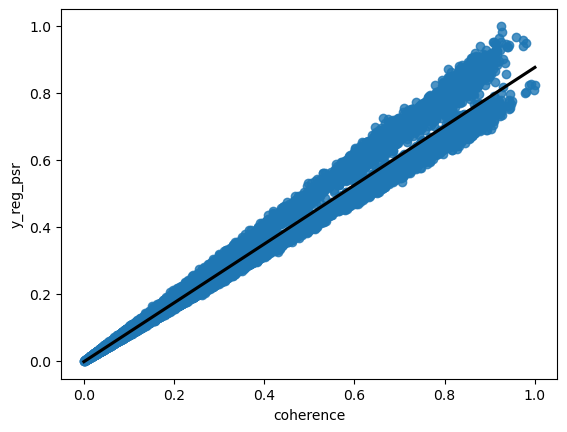

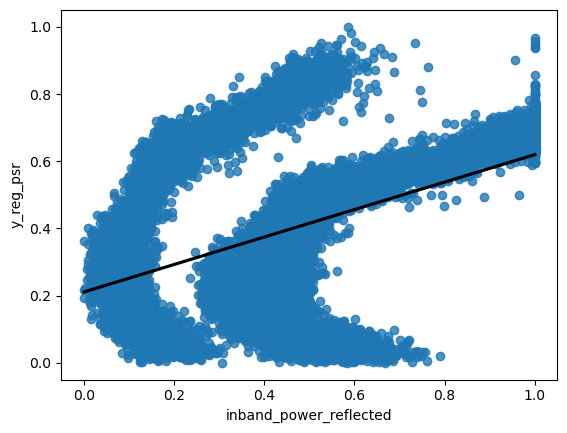

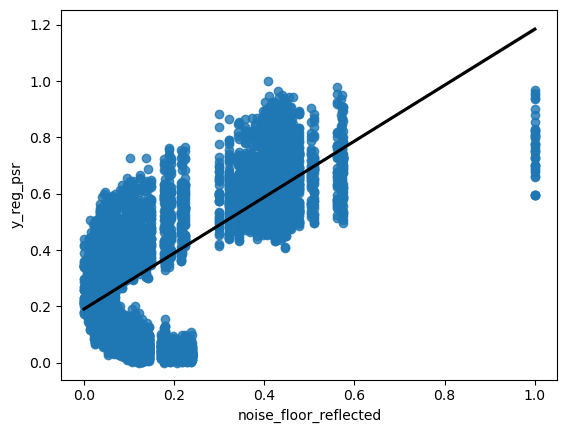

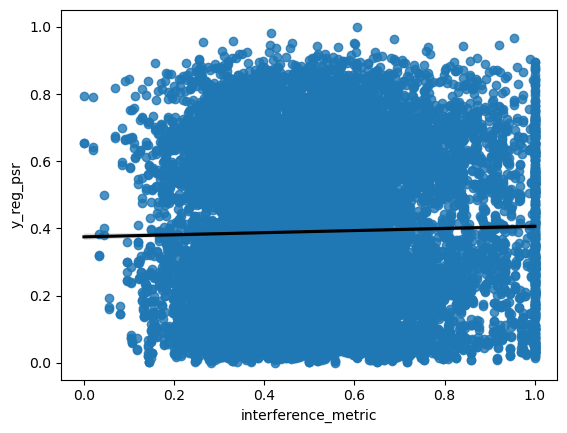

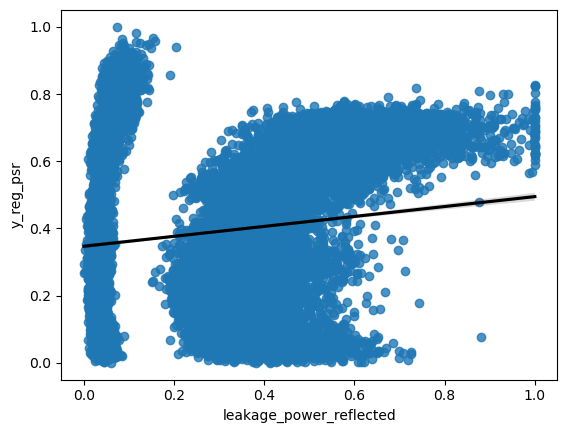

In [27]:
my_cols = ['coherence', 'inband_power_reflected', 'noise_floor_reflected', 'interference_metric', 'leakage_power_reflected']
for i in my_cols:
    sns.regplot(x=i, y="y_reg_psr", data=no_outlier, line_kws={"color":"black"})
    plt.show()

In [28]:
x_new = no_outlier[['coherence', 'inband_power_reflected', 'noise_floor_reflected', 'interference_metric', 'leakage_power_reflected']].to_numpy().reshape(-1,5)
x_new

array([[0.1287669 , 0.43204932, 0.07992976, 0.52027759, 0.27828028],
       [0.12950388, 0.381968  , 0.07992976, 0.52027759, 0.36849143],
       [0.13524497, 0.09260553, 0.07992976, 0.52027759, 0.02517402],
       ...,
       [0.76869307, 0.93842615, 0.42621898, 0.39987449, 0.49220929],
       [0.76639488, 0.85151479, 0.42621898, 0.39987449, 0.72730841],
       [0.77388388, 0.40847133, 0.42621898, 0.39987449, 0.0665666 ]])

In [29]:
y_new = np.array(no_outlier["y_reg_psr"]).reshape(-1,1)
y_new

array([[0.10702163],
       [0.1051892 ],
       [0.12985614],
       ...,
       [0.64108484],
       [0.63627074],
       [0.75488449]])

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_new, y_new, train_size = 0.7, random_state = 0)

In [32]:
from sklearn.linear_model import LinearRegression  # y = m1*x1 + m2*x2 + m3*x3 + c + e (Multiple Linear Regression)
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error, r2_score
# Option between MSE, RMSE, and MAE - No need to use all three of these squared errors.

In [33]:
# 'multi' is the name of the trained model.

In [34]:
# Step 1: Build a model using an algorithm.
# Step 2: Fit the model.
model = LinearRegression()
multi = model.fit(x_new_train, y_new_train)  # Here, we are building the model and training it in the same line.

In [35]:
# Step 3: Check training performance of the model.
r_square = multi.score(x_new_train, y_new_train)
print("R-square =", r_square)  # Training model performance is 99%, which is very good. A bad model will not give good results.

R-square = 0.9898041237031424


In [36]:
# Step 4: Predict through unseen data using predict().
y_new_pred = multi.predict(x_new_test)  # We are predicting the values of y_test and storing it as 'y_prediction'. The input is given by passing the input as x_test -> if not matching, it is an error or residual (for numerical columns).
y_new_pred  # This is predicting and comparing with 'y_new_test' values.

array([[0.5359286 ],
       [0.66136602],
       [0.61627374],
       ...,
       [0.54272597],
       [0.02219752],
       [0.53571878]])

In [37]:
mse = mean_squared_error(y_new_test, y_new_pred)
print("MSE =", mse)  # Smaller errors are better. Example: 2 is better than 2000 errors in case of MSE. MSE is numerical, not %, all errors are %.

MSE = 0.0005736993813270309


In [38]:
rmse = root_mean_squared_error(y_new_test, y_new_pred)
print("RMSE =", rmse)

RMSE = 0.02395202248928117


In [39]:
mae = mean_absolute_error(y_new_test, y_new_pred)  # For absolute (mean_absolute_error), we do not use 'squared=False'.
print("MAE =", mae)

MAE = 0.018438886273113485


In [40]:
# Step 5: Check testing (r_square) performance of the model. -> Checks the reliability of the model.
r2_new = r2_score(y_new_test, y_new_pred)  # Final R-square value
print("New R-squared =", r2_new)  # The model performance is 98.9%, which is very good.

New R-squared = 0.9893330695290452


# Linear regression works better when there is more than one input column.

In [42]:
multi.intercept_  # The linear regression model gives the intercept value.

array([0.03074038])

In [43]:
multi.coef_  # Since we have taken 5 independent variables, we get 5 slopes for each line of best fit.

array([[ 0.89831756, -0.04122905,  0.05517565,  0.0073995 , -0.1290115 ]])

In [44]:
# Create a table containing residuals.
df_residual = pd.DataFrame()  # Creating an empty DataFrame
df_residual["y_pred"] = pd.DataFrame(y_new_pred)  # 'y_pred' - Creating a new column for the predicted y-values in a DataFrame
# Assigning all 'y_new_pred' values to a 'y_pred' column in a DataFrame

In [45]:
df_residual["y_actual"] = pd.DataFrame(y_new_test)  # 'y_actual' - Creating a new column for the actual y-values in a DataFrame

In [46]:
# Residual = |Predicted - Actual|
df_residual["residual"] = df_residual["y_actual"] - df_residual["y_pred"]  # Calculate the residuals for each row.
df_residual  # Table with actual, predicted, and residual values

,y_pred,y_actual,residual
0,0.535929,0.543550,0.007621
1,0.661366,0.679005,0.017639
2,0.616274,0.626603,0.010329
3,0.470029,0.462426,-0.007603
4,0.585034,0.536939,-0.048096
...,...,...,...
5611,0.172257,0.174676,0.002419
5612,-0.004044,0.018515,0.022559
5613,0.542726,0.503340,-0.039386
5614,0.022198,0.047082,0.024885


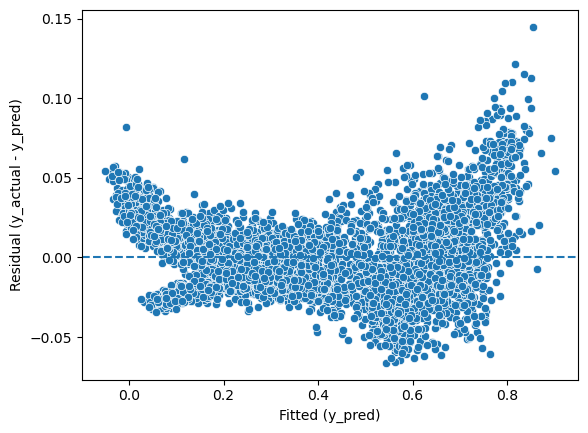

In [47]:
# Plot residuals vs. y_pred (fitted values)
# Check if the assumption 'Homascedasticity' is applicable for this model.
sns.scatterplot(x=df_residual["y_pred"], y=df_residual["residual"])
plt.axhline(0, linestyle="--")
plt.xlabel("Fitted (y_pred)")
plt.ylabel("Residual (y_actual - y_pred)")
plt.show()

# Residual diagnostics indicate mild heteroscedasticity and slight curvature, particularly at higher fitted values. This behavior is consistent with modeling a bounded response variable (PSR ∈ [0,1]) using a linear framework.

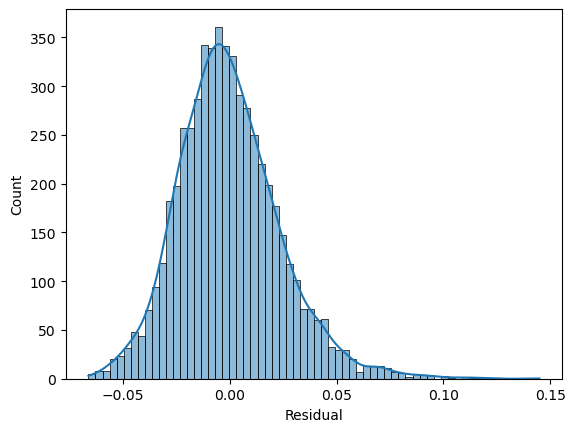

In [49]:
# Assumption normality of residuals
sns.histplot(df_residual["residual"], kde=True)
plt.xlabel("Residual")
plt.show()

# The residual distribution is approximately symmetric and centered at zero, with mild right-skewness. According to the large residual sample size (n = 5615), the normality assumption is reasonably satisfied for practical inference.
--------------------------------------------------------------------------------------------------------------------------------------------------------

# Interpretations:
# The multiple linear regression model reached a final R^2 of about 0.98, showing it has almost complete explanatory power.
# The standardized coefficients showed that coherence is the main predictor of PSR, which aligns with the structural definition of PSR as a metric based on correlation.
# Reflected power and noise metrics added a small amount of additional variance, while interference had a very slight linear effect.
# Residual analysis showed minor heteroscedasticity due to the limited nature of PSR.
# In summary, the model demonstrates that PSR is mainly influenced by coherence, with environmental RF factors having a secondary impact.

In [52]:
len(no_outlier)

18720

In [53]:
# Target column = 'y_reg_psr' is to be predicted. So, it will be considered as a dependent column.
# All other columns except for the column 'y_reg_psr' will be independent.

# Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import roc_curve

Accuracy : 0.9725783475783476
F1 Score : 0.9454287739192062
ROC-AUC  : 0.9966571451460778

Confusion Matrix:
 [[4128   74]
 [  80 1334]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4202
           1       0.95      0.94      0.95      1414

    accuracy                           0.97      5616
   macro avg       0.96      0.96      0.96      5616
weighted avg       0.97      0.97      0.97      5616



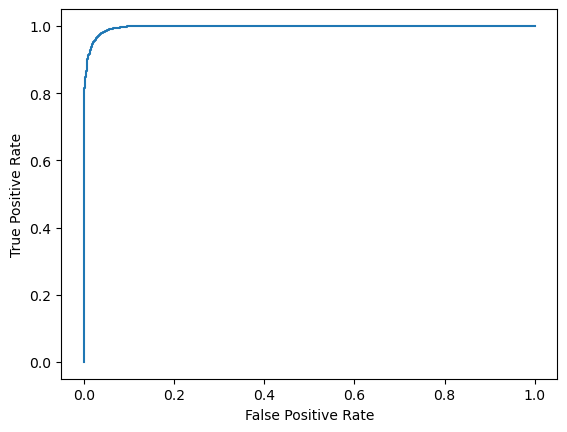

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.997


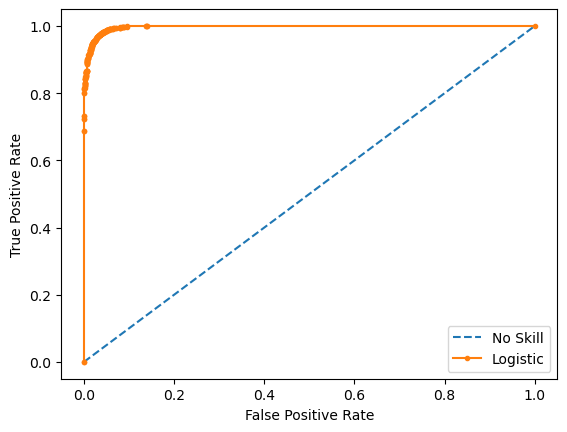

In [56]:
# Logistic Regression
# 1. Feature set
features = ['coherence', 'inband_power_reflected', 'noise_floor_reflected', 'interference_metric', 'leakage_power_reflected']
x = no_outlier[features]
y = no_outlier['y_cls_reliable']

# 2. Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=0)

# 3. Build and fit Logistic Regression model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

# 4. Predict on test set
y_pred = logreg.predict(x_test)
y_prob = logreg.predict_proba(x_test)

# 5. Evaluation metrics
print("Accuracy :", accuracy_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, logreg.predict_proba(x_test)[:,1]))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob[:,1], pos_label = 1)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

lr_probs = logreg.predict_proba(x_test)
ns_probs = [0 for _ in range(len(y_test))]  # We are using list comprehension.

# 6. ROC curve
lr_probs = lr_probs[:, 1]
# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# Summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# Plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# Add axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show the legend
plt.legend()
# Show the plot
plt.show()

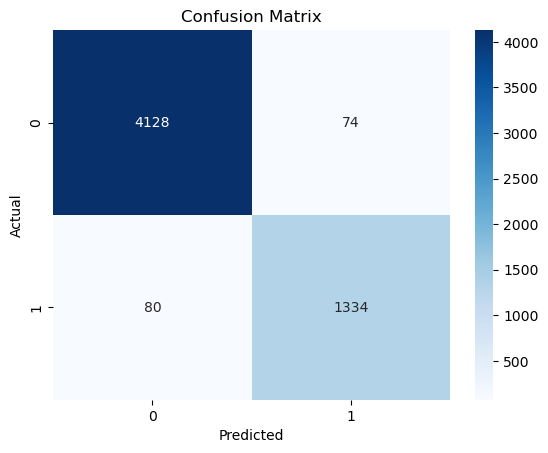

In [57]:
# Create a heat map for the confusion matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")  # Heat map handles ONLY numerical data.
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

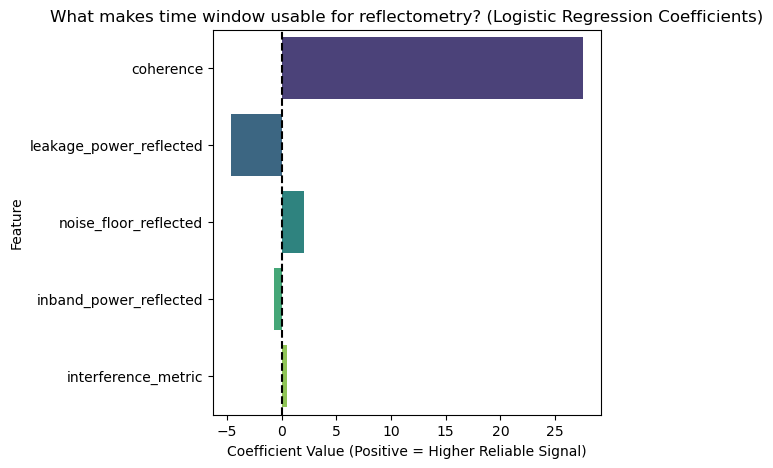

In [58]:
# Get feature names and their coefficients (importance)
feature_names = x.columns
coefficients = logreg.coef_[0]

# Create a simple DataFrame to view them
importance = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients})
importance = importance.sort_values(by='Importance', key=abs, ascending=False)

# Plot it
plt.figure(figsize=(5,5))
sns.barplot(data=importance, x='Importance', y='Feature', hue='Feature', palette='viridis', legend=False)
plt.title("What makes time window usable for reflectometry? (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value (Positive = Higher Reliable Signal)")
plt.axvline(0, color='black', linestyle='--') # Add a vertical line at 0

plt.show()

# Interpretations:
# A logistic regression model was created to categorize time windows as either reliable or unreliable for reflectometry. This was based on predictors such as coherence, reflected in-band power, reflected noise floor, interference metric, and reflected leakage power. The model performed exceptionally well, achieving an accuracy of 97.3%, an F1-score of 0.945, and a ROC-AUC of 0.997, which shows it can effectively distinguish between the two classes.
# The confusion matrix indicated low misclassification rates for both reliable and unreliable windows, showcasing balanced predictive performance even with slight class imbalance. The ROC curve also confirmed nearly perfect separability.
# Analysis of the coefficients stated that coherence is the key predictor of reliability, having a significantly greater impact than the other variables. 
# Reflected leakage power had a negative effect, suggesting that higher leakage decreases the chances of reliable detection. Other RF metrics had relatively minor linear effects.
# In summary, the findings suggest that the usability of windows for reflectometry is mainly determined by correlation coherence, while leakage and noise conditions play a secondary role.
--------------------------------------------------------------------------------------------------------------------------------------------------------

# K-Nearest Neighbors

In [61]:
# K-Nearest Neighbors
n = len(no_outlier)  # number of elements (rows) in a dataset without any outliers (input variable)
print(n)
# Assume the value 'k' as the square root of the number of elements (rows) in an array
k = int(round(n)**0.5)
print(k)  # This is NOT the best value of 'k'.

18720
136


# Interpretations:
# A K-Nearest Neighbors classifier was tested with k-values ranging from 1 to 197. The best performance occurred at k = 9, resulting in a classification accuracy of about 97.6%. As k-values increased, accuracy slowly declined, showing more bias from oversmoothing.
# The high accuracy indicates a clear distinction between reliable and unreliable windows in the feature space. These findings align with those from logistic regression and further show that the chosen signal metrics offer very useful information for assessing reflectometry window usability.

# K-Means Clustering

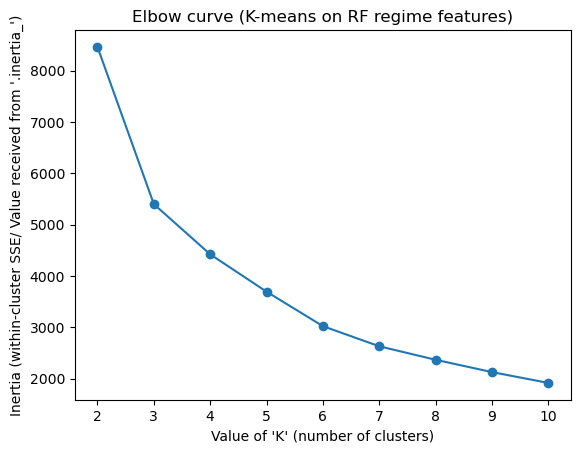

For clusters = 2 , the silhouette score is 32.86
For clusters = 2 , the davies bouldin score is 1.22
For clusters = 2 , the calinski harabasz score is 3017.22

For clusters = 3 , the silhouette score is 35.33
For clusters = 3 , the davies bouldin score is 0.92
For clusters = 3 , the calinski harabasz score is 4090.57

For clusters = 4 , the silhouette score is 31.66
For clusters = 4 , the davies bouldin score is 0.96
For clusters = 4 , the calinski harabasz score is 3810.59

For clusters = 5 , the silhouette score is 30.84
For clusters = 5 , the davies bouldin score is 1.01
For clusters = 5 , the calinski harabasz score is 3685.38

For clusters = 6 , the silhouette score is 30.9
For clusters = 6 , the davies bouldin score is 0.94
For clusters = 6 , the calinski harabasz score is 3712.67

For clusters = 7 , the silhouette score is 32.52
For clusters = 7 , the davies bouldin score is 0.89
For clusters = 7 , the calinski harabasz score is 3890.97

For clusters = 8 , the silhouette score i

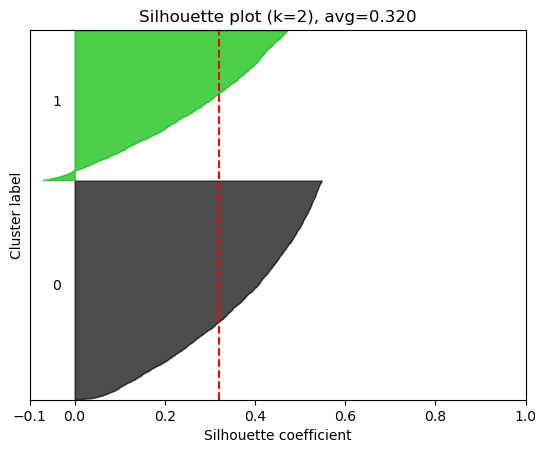

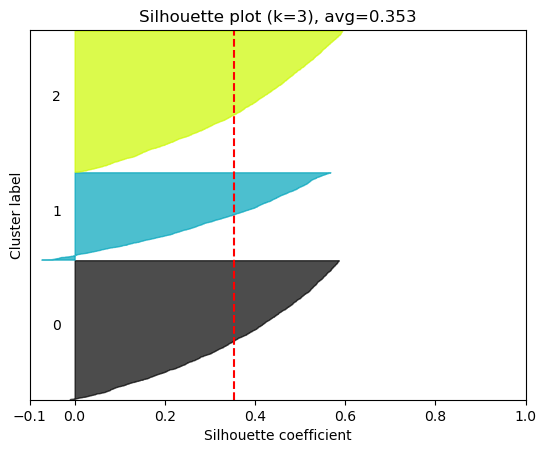

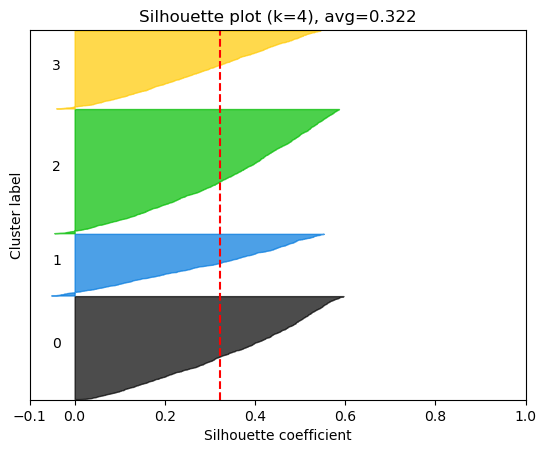

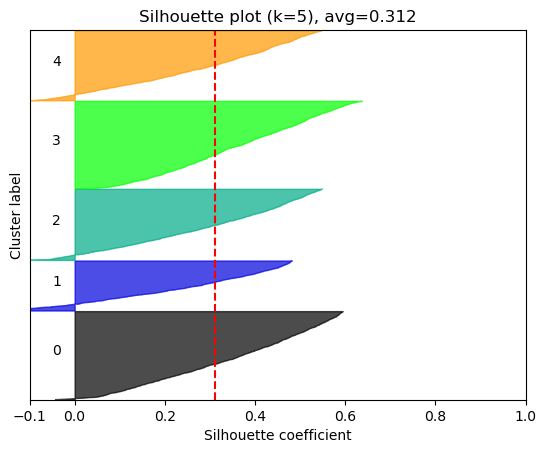

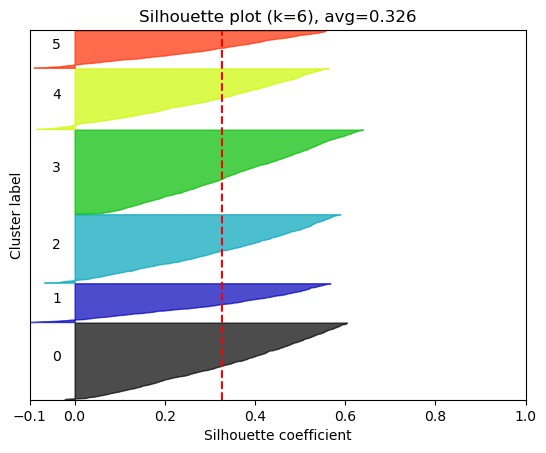

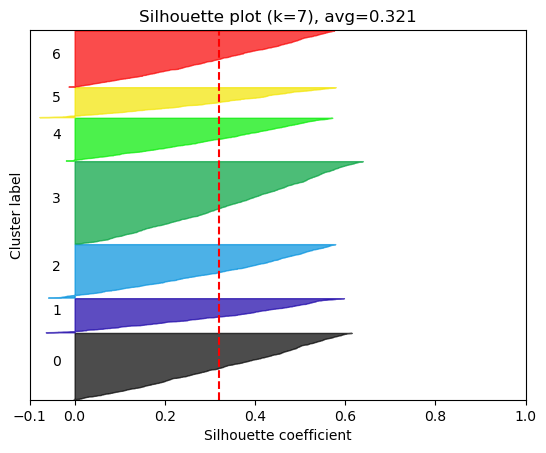

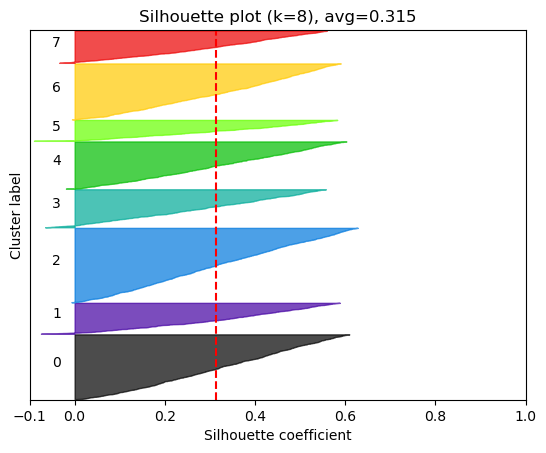

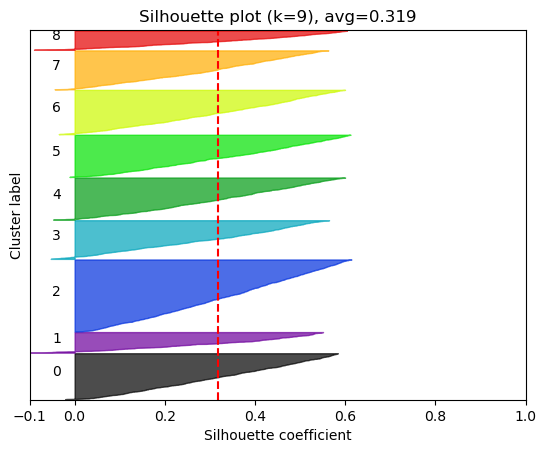

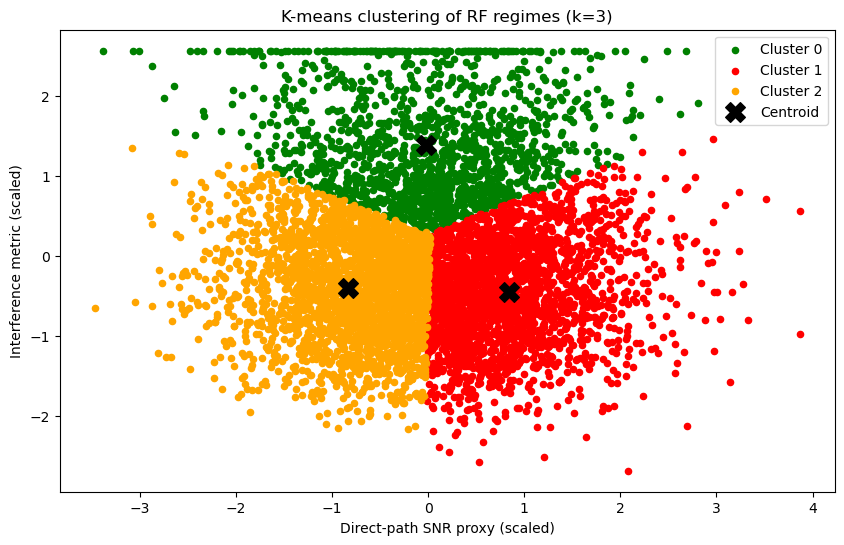

In [64]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, silhouette_samples
# We will use other performance measures to see the appropriate number of clusters.
import matplotlib.cm as cm

# 1) Define a unique window key (cluster windows, not filter rows)
window_id = ["t_start_sec", "window_stride", "channel", "fc_mhz", "bw_khz", "f_offset_hz"]
# columns that uniquely identify one signal window since the dataset has 3 rows per physical window (one per filter: Butterworth, Chebyshev, & Bessel).
# So if you cluster rows directly, you’ll cluster filters (not RF regimes).

# 2) One row per window
window_df = no_outlier.drop_duplicates(subset=window_id).copy()

# 3) Build 2 regime features
window_df["snr_direct"] = window_df["raw_inband_power_direct"] - window_df["noise_floor_direct"]  # Calculate the direct signal-to-noise ratio (SNR)
features = ["snr_direct", "interference_metric"]

# 4) Build X and SCALE it (important for K-means)
scaler = StandardScaler()
X = scaler.fit_transform(window_df[features].to_numpy())

# -----------------------------
# Elbow (inertia) curve
# -----------------------------
err = []
my_cluster = np.arange(2, 11)

for k in my_cluster:
    temp = KMeans(n_clusters=k)
    temp.fit(X)
    err.append(temp.inertia_)  # '.inertia_' is provided to us in KMeans, it is the sum of squared distances of the samples.

# We will create an elbow curve to visualize data and find the most appropriate number of custers.
plt.plot(my_cluster, err, marker="o")
plt.xlabel("Value of 'K' (number of clusters)")
plt.ylabel("Inertia (within-cluster SSE/ Value received from '.inertia_')")
plt.title("Elbow curve (K-means on RF regime features)")
plt.show()

# -----------------------------
# Other cluster validity scores
# -----------------------------
for j in my_cluster:
    temp_model = KMeans(n_clusters = j, random_state = 0)
    cluster_labels = temp_model.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels) * 100
    print("For clusters =", j,",","the silhouette score is", round(silhouette_avg,2))
    print("For clusters =", j,",","the davies bouldin score is", round(davies_bouldin_score(X, temp_model.labels_), 2))
    print("For clusters =", j,",","the calinski harabasz score is", round(calinski_harabasz_score(X, temp_model.labels_), 2))
    print()

# -----------------------------
# Silhouette plots
# -----------------------------
range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))  # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot (10 for the 0 samples)

    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")
    # The vertical (v) line for average silhouette score of all the values
    sil_avg = silhouette_score(X, cluster_labels)
    ax1.axvline(x=sil_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax1.set_title(f"Silhouette plot (k={n_clusters}), avg={sil_avg:.3f}")

plt.show()

# Silhouette curve can help us find the suitable number of clusters.

# -----------------------------
# Final model (example: k=3) -> Let's finalize k=3, means that we need 3 groups.
# -----------------------------
final_k = 3
final_km = KMeans(n_clusters=final_k, random_state=0)
clusters = final_km.fit_predict(X)

window_df["cluster"] = clusters

# Cluster 0: avg SNR, high interference
# Cluster 1: high SNR, low interference
# Cluster 2: low SNR, low interference

# 2D scatter in the SAME space you clustered (scaled)
segments = [f"Cluster {i}" for i in range(final_k)]
colors = ["green", "red", "orange"]  # OK as a default set for paper-style meaning

plt.figure(figsize=(10,6))
for i in range(final_k):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1],
                c=colors[i], label=segments[i], s=20)

centroids = final_km.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c="black", marker="X", s=200, label="Centroid")

plt.title("K-means clustering of RF regimes (k=3)")
plt.xlabel("Direct-path SNR proxy (scaled)")
plt.ylabel("Interference metric (scaled)")
plt.legend()
plt.show()

   cluster  filter_type  psr_mean  psr_median  stability_med     n
0        0            0  0.446528    0.403999       0.270623  1485
1        0            1  0.374447    0.339339       0.270623  1485
2        0            2  0.372428    0.337617       0.270623  1485
3        1            0  0.426167    0.373957       0.280398  2373
4        1            1  0.356701    0.313751       0.280398  2373
5        1            2  0.354664    0.311620       0.280398  2373
6        2            0  0.447807    0.419655       0.284279  2382
7        2            1  0.374087    0.350638       0.284279  2382
8        2            2  0.372007    0.350264       0.284279  2382
         filter_type  psr_mean  psr_median  stability_med     n
cluster                                                        
0                  0  0.446528    0.403999       0.270623  1485
1                  0  0.426167    0.373957       0.280398  2373
2                  0  0.447807    0.419655       0.284279  2382


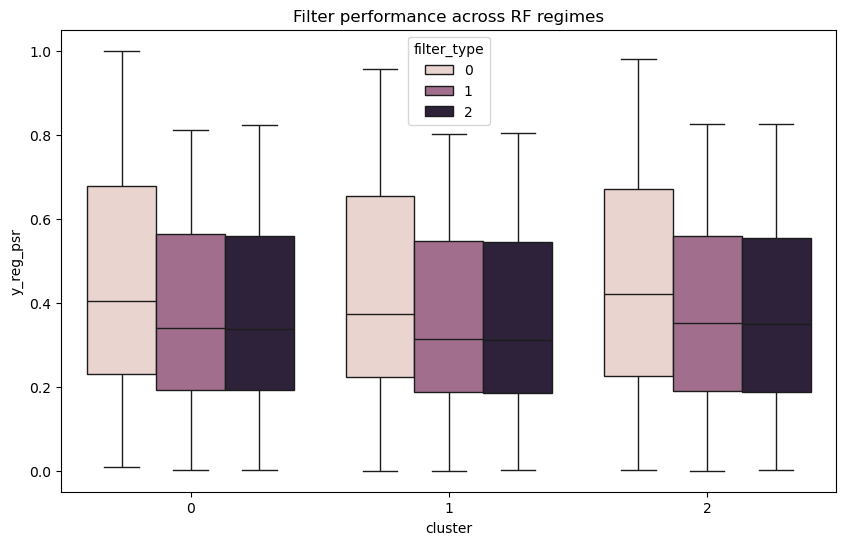

[[-0.01833343  1.37897431]
 [ 0.84463965 -0.45314476]
 [-0.84028407 -0.4072163 ]]


In [65]:
# Determine which filter wins (Bessel (0), Butterworth (1), or Chebyshev (2)) by making a summary table

df_clustered = no_outlier.merge(window_df[window_id + ["cluster"]], on=window_id, how="left")

summary = (df_clustered.groupby(["cluster","filter_type"]).agg(
        psr_mean=("y_reg_psr","mean"),
        psr_median=("y_reg_psr","median"),
        stability_med=("delay_stability_sec","median"),
        n=("y_reg_psr","count")).reset_index())

print(summary)

winners = (summary.sort_values(["cluster","psr_mean"], ascending=[True,False]).groupby("cluster").first())

print(winners)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clustered, x="cluster", y="y_reg_psr", hue="filter_type")
plt.title("Filter performance across RF regimes")
plt.show()

print(final_km.cluster_centers_)

# Interpretations:
# Unsupervised K-means clustering found three RF regimes that can be physically interpreted, which relate to interference-dominated, clean high-SNR, and low-SNR fading conditions.
# Even though these regimes signify different propagation environments, the performance ranking of filter families remained consistent across the clusters.
# Therefore, the Bessel filter achieved the best PSR in every regime, showing that its performance advantage is strong across various propagation conditions, not just specific to one regime.